### Change of Mind
##### At which behavior transitions do these change of mind occur?
##### Do the change of mind trials have better reward performance than otherwise?

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import spyglass as nd
import pandas as pd
import numpy as np
import xarray as xr
from scipy import stats
from scipy import linalg
import os
import pickle
import matplotlib.pyplot as plt
from ripple_detection.core import segment_boolean_series

from spyglass.common import (Session, IntervalList,LabMember, LabTeam, Raw, Session, Nwbfile,
                            Electrode,LFPBand,interval_list_intersect)
from spyglass.common import TaskEpoch
from spyglass.spikesorting.v0 import (SortGroup, 
                                    SpikeSortingRecording,SpikeSortingRecordingSelection)
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.common.common_position import IntervalPositionInfo, RawPosition, IntervalLinearizedPosition, TrackGraph

[2025-03-13 21:04:07,191][INFO]: Connecting shijiegu-alt@lmf-db.cin.ucsf.edu:3306
[2025-03-13 21:04:07,258][INFO]: Connected shijiegu-alt@lmf-db.cin.ucsf.edu:3306


In [4]:
from spyglass.shijiegu.pairwiseDecode import merge_overlapping_ranges,removeEmptyDecode
from spyglass.shijiegu.ripple_add_replay import remove_adjacent
from spyglass.shijiegu.pairwiseDecode import replay_transitions,categorized_replay_transitions,behavior_transitions,behavior_transitions_count,findXCorrAllDays
from spyglass.shijiegu.decodeHelpers import runSessionNames

In [53]:
from spyglass.shijiegu.Analysis_SGU import TrialChoice,EpochPos,MUA,get_linearization_map,TrialChoiceChangeOfMind
from spyglass.shijiegu.decodeHelpers import runSessionNames
from spyglass.shijiegu.ripple_add_replay import plot_decode_spiking
from spyglass.shijiegu.changeOfMind import (find_turnaround_time, findProportion,
            find_trials, load_epoch_data_wrapper, find_direction, find_trials_animal,
            find_statescrripts)
from spyglass.shijiegu.changeOfMind_triggered import (find_triggered_animal,find_triggered_transition_animal,
    find_triggered_log_session, find_triggered_log_animal,labels,seq1,seq2,rev1,rev2,rev3)

In [152]:
(retro_wouldhave, transition_wouldhave, transition,
 correct, correct_rand, correct_wouldhave, recent, recent_wouldhave) = ({}, {}, {}, {}, {}, {}, {}, {})

[10:41:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[10:41:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [164]:
#############
animal = 'Eliot'
seq_map = seq2
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221017','20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
    
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

print(animal)

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = seq2
    
(retro_wouldhave[animal],transition_wouldhave[animal], transition[animal],
 correct[animal], correct_rand[animal], correct_wouldhave[animal],
 recent[animal], recent_wouldhave[animal]) = find_triggered_transition_animal(animal, dates_to_plot, seq_maps)

#############
animal = 'Molly'
seq_map = seq2
dates_to_plot = ['20220415','20220416','20220417','20220418','20220419','20220420']
datafolder = f'/stelmo/shijie/behavior_pilot/Batch1/{animal}'

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = seq2
    
print(animal)
(retro_wouldhave[animal],transition_wouldhave[animal], transition[animal],
 correct[animal], correct_rand[animal], correct_wouldhave[animal],
 recent[animal], recent_wouldhave[animal]) = find_triggered_transition_animal(animal, dates_to_plot, seq_maps)


#############
animal = 'Lewis'
animal_savename = 'Lewis1'
dates_to_plot = ['20240102','20240103','20240104','20240105','20240106','20240107','20240108','20240109',
                 '20240110','20240113','20240114']#'20240115','20240116','20240117','20240118','20240119','20240120']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = rev2
    
print(animal)
(retro_wouldhave[animal_savename],transition_wouldhave[animal_savename], transition[animal_savename],
 correct[animal_savename], correct_rand[animal_savename], correct_wouldhave[animal_savename],
 recent[animal_savename], recent_wouldhave[animal_savename]) = find_triggered_transition_animal(animal, dates_to_plot, seq_maps)

animal = 'Lewis'
animal_savename = 'Lewis2'
dates_to_plot = ['20240115','20240116','20240117','20240118','20240119','20240120']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = rev1
    
print(animal)
(retro_wouldhave[animal_savename],transition_wouldhave[animal_savename], transition[animal_savename],
 correct[animal_savename], correct_rand[animal_savename], correct_wouldhave[animal_savename],
 recent[animal_savename], recent_wouldhave[animal_savename]) = find_triggered_transition_animal(animal, dates_to_plot, seq_maps)

#############
animal = 'Haydn'
dates_to_plot = ['20230603','20230604','20230605','20230606','20230607','20230608']
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = rev3
    
print(animal)
(retro_wouldhave[animal],transition_wouldhave[animal], transition[animal],
 correct[animal], correct_rand[animal], correct_wouldhave[animal],
 recent[animal], recent_wouldhave[animal]) = find_triggered_transition_animal(animal, dates_to_plot, seq_maps)

[10:55:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[10:55:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


Eliot
currently investigating:
02_Seq2Session1
pos 1 valid times
currently investigating:
04_Seq2Session2
pos 3 valid times
currently investigating:
06_Seq2Session3
pos 5 valid times
currently investigating:
08_Seq2Session4
pos 7 valid times
currently investigating:
02_Seq2Session1
pos 1 valid times
currently investigating:
04_Seq2Session2
pos 3 valid times
currently investigating:
05_Seq2Session3
pos 4 valid times
currently investigating:
07_Seq2Session4
pos 6 valid times
currently investigating:
09_Seq2Session5
pos 8 valid times
currently investigating:
11_Seq2Session6
pos 10 valid times
currently investigating:
02_Seq2Session1
pos 1 valid times
currently investigating:
04_Seq2Session2
pos 3 valid times
currently investigating:
06_Seq2Session3
pos 5 valid times
currently investigating:
08_Seq2Session4
pos 7 valid times
currently investigating:
10_Seq2Session5
pos 9 valid times
currently investigating:
02_Seq2Session1
pos 1 valid times
currently investigating:
04_Seq2Session2
pos 3 va

### A. Change of mind trials have better reward performance.

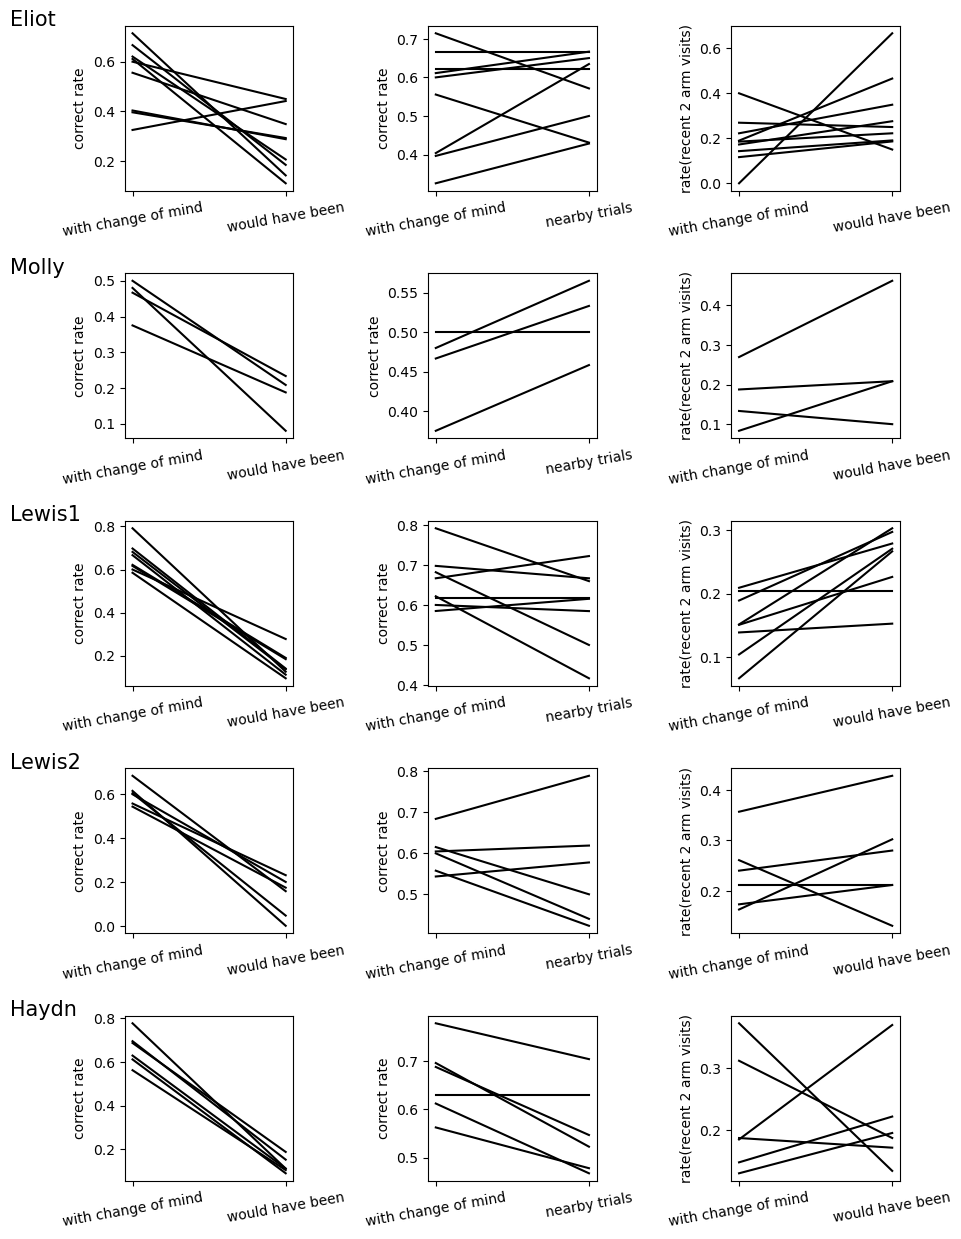

In [165]:
animals = list(correct_wouldhave.keys())
fig,axes = plt.subplots(len(animals),3,figsize = (10,3*len(animals)))
plt.subplots_adjust(wspace=0.8, hspace=0.5)

row_ind = 0
for animal in animals:
    
    dates_to_plot = list(correct_wouldhave[animal].keys())
    for d_ind in range(len(dates_to_plot)):
        d = dates_to_plot[d_ind]
        correct_day = correct[animal][d]
        correct_wouldhave_day = correct_wouldhave[animal][d]
        correct_rand_day = correct_rand[animal][d]
        recent_day = recent[animal][d]
        recent_wouldhave_day = recent_wouldhave[animal][d]
    
        # rate
        rate = np.sum(correct_day)/len(correct_day)
        rate_wouldhave = np.sum(correct_wouldhave_day)/len(correct_wouldhave_day)
        rate_rand = np.sum(correct_rand_day)/len(correct_rand_day)
        
        recent_rate = np.sum(recent_day)/len(recent_day)
        recent_rate_wouldhave = np.sum(recent_wouldhave_day)/len(recent_wouldhave_day)
        if len(correct_day) <= 10:
            continue
        
        axes[row_ind,0].plot([1,2],[rate,rate_wouldhave],color = 'k')
        axes[row_ind,1].plot([1,2],[rate,rate_rand],color = 'k')
        axes[row_ind,2].plot([1,2],[recent_rate,recent_rate_wouldhave],color = 'k')

    axes[row_ind,0].set_xticks([1,2])
    axes[row_ind,0].set_xticklabels(['with change of mind','would have been'],rotation = 10)
    axes[row_ind,0].set_ylabel('correct rate')
        
    axes[row_ind,1].set_xticks([1,2])
    axes[row_ind,1].set_xticklabels(['with change of mind','nearby trials'],rotation = 10)
    axes[row_ind,1].set_ylabel('correct rate')

    axes[row_ind,2].set_xticks([1,2])
    axes[row_ind,2].set_xticklabels(['with change of mind','would have been'],rotation = 10)
    axes[row_ind,2].set_ylabel('rate(recent 2 arm visits)')

    axes[row_ind,0].text(0.2,axes[row_ind,0].get_ylim()[1],animal,fontsize = 15)
    row_ind += 1

### B. Change of mind trials occur at biased transitions.

In [166]:
def COM(animal,dates_to_plot,C_behavior_all,P_behavior_all,transition_wouldhave,retro_wouldhave):
    
    # seperate them into dates by specific transitions
    P_behavior = np.zeros((len(dates_to_plot),len(all_transitions))) + np.nan
    C_behavior = np.zeros((len(dates_to_plot),len(all_transitions))) + np.nan
    C_COM = np.zeros((len(dates_to_plot),len(all_transitions))) + np.nan #change of mind
    C_COM_retro = np.zeros((len(dates_to_plot),len(all_transitions))) + np.nan #change of mind
    P_COM = np.zeros_like(C_COM) + np.nan
    P_COM_retro = np.zeros_like(C_COM_retro) + np.nan

    for d_ind in range(len(dates_to_plot)):
        d = dates_to_plot[d_ind]
        P_wouldhave_animal = normalize(transition_wouldhave[animal][d])
        P_wouldhave_retro_animal = normalize(retro_wouldhave[animal][d].T).T
        
        C_wouldhave_animal = transition_wouldhave[animal][d]
        C_wouldhave_retro_animal = retro_wouldhave[animal][d]
        
        if np.sum(C_wouldhave_animal) < 5:
            print("less than 10 transitions on ",d)
            continue
        for t_i in range(len(all_transitions)):
            (i,j) = all_transitions[t_i]
            P_behavior[d_ind,t_i] = P_behavior_all[d][i][j]
            C_behavior[d_ind,t_i] = C_behavior_all[d][i][j]
            P_COM[d_ind,t_i] = P_wouldhave_animal[i][j]
            P_COM_retro[d_ind,t_i] = P_wouldhave_retro_animal[i][j]
            C_COM[d_ind,t_i] = C_wouldhave_animal[i][j]
            C_COM_retro[d_ind,t_i] = C_wouldhave_retro_animal[i][j]
            
    return P_behavior, P_COM, P_COM_retro, C_behavior, C_COM, C_COM_retro

In [167]:
def plot_matrix(animal, dates_to_plot, matrices, matrix_labels):
    
    fig,axes = plt.subplots(len(matrices),len(dates_to_plot),figsize = (20,2*(len(matrices))),sharex = True)

    
    for d_ind in range(len(dates_to_plot)):
        d = dates_to_plot[d_ind]

        for axe_ind in range(len(matrices)):
            behavior_data = matrices[axe_ind][d]
            label = matrix_labels[axe_ind]

            axes[axe_ind,0].text(-5,2,label,fontsize = 15)
            
            can_plot = True #under some condition, can_plot is set to False
            if label == "behavior_p":
                vmin = 0.2
                vmax = 0.5
                
            elif label == "behavior_count" or label[:10] == "transition":
                vmin = np.nanquantile(behavior_data,0.1)
                vmax = np.nanquantile(behavior_data,0.9)
                if np.sum(behavior_data) < 10:
                    can_plot = False
            else:
                vmin = np.nanquantile(behavior_data,0.1)
                vmax = np.nanquantile(behavior_data,0.9)
                if np.sum(behavior_data) < 10:
                    can_plot = False
                
                    
            if can_plot:
                im1 = axes[axe_ind,d_ind].imshow(behavior_data, vmin = vmin, vmax = vmax, origin = 'upper',cmap = 'YlGn')

            axes[axe_ind,d_ind].set_axis_off()
            axes[axe_ind,d_ind].set_xticks(np.arange(4))
            axes[axe_ind,d_ind].set_yticks(np.arange(4))
            axes[axe_ind,d_ind].set_xticklabels(['1','2','3','4'])
            axes[axe_ind,d_ind].set_yticklabels(['1','2','3','4'])
    
        axes[0,d_ind].text(0.2,-2,d,fontsize = 15)
        

    for axe_ind in range(len(matrices)):
        label = matrix_labels[axe_ind]
        axes[axe_ind,0].text(-5,2,label,fontsize = 15)
    
    
    # add space for colour bar
    axes[0,0].text(-5,-5,animal,fontsize = 20)
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.55, 0.01, 0.2])
    fig.colorbar(im1, cax=cbar_ax,ticks=[0.1, 0.25, 0.4, 0.5])
    cbar_ax.set_yticklabels(['<0.2', '0.25', '0.4', '>0.5'])  # vertically oriented colorbar

In [168]:
def return_xy(dates_to_plot,P_behavior,P_COM_retro,diff_y = True):
    # just pair up to variables
    x = []
    y = []

    num_of_dates = len(dates_to_plot)
    if diff_y:
        num_of_dates = len(dates_to_plot)-1
    for d_ind in range(1,num_of_dates):
        for t_i in range(len(all_transitions)):
            (i,j) = all_transitions[t_i]
            x_ = P_COM_retro[d_ind,t_i] #P_COM[d_ind,t_i]
            if diff_y == True:
                y_ = P_behavior[d_ind+1,t_i] - P_behavior[d_ind,t_i] 
            else:
                 y_ = P_behavior[d_ind,t_i]
            if np.isnan(x_) or np.isnan(y_):
                continue
            x.append(x_)
            y.append(y_)
    return x, y

def fitLM(x,y):
    # linear fit
    xc = sm.add_constant(x)
    results = sm.OLS(y, xc).fit()
    pvalue = results.f_pvalue
    
    return results, pvalue

In [169]:
import itertools
from spyglass.shijiegu.changeOfMind import normalize
# plot change of mind transition against delta p behavior
from sklearn.linear_model import LinearRegression

all_transitions = [(0,1),(1,0),
                   (0,2),(2,0),
                   (0,3),(3,0),
                   (1,2),(2,1),
                   (1,3),(3,1),
                   (2,3),(3,2)]
all_transitions_legend = [(j[0]+1,j[1]+1) for j in all_transitions] #for legend 1 index
cmap = plt.get_cmap('tab20')

In [170]:
animal = 'Lewis'

dates_to_plot = ['20240104','20240105','20240106','20240107','20240108','20240109',
                 '20240110','20240113','20240114']#'20240115','20240116','20240117','20240118','20240119','20240120']

dates_to_plot = ['20240115','20240116','20240117','20240118','20240119','20240120']


In [171]:
animal = 'Lewis2'

In [20]:
animal = "Eliot"

In [27]:
dates_to_plot = list(retro_wouldhave[animal].keys())

In [172]:
P_behavior_all,xcorr_plot,xcorr25_plot,xcorr975_plot = behavior_transitions(animal[:5],dates_to_plot)
C_behavior_all, C_behavior_reward_all = behavior_transitions_count(animal[:5],dates_to_plot)

P_behavior, P_COM, P_COM_retro, C_behavior, C_COM, C_COM_retro = COM(
    animal,dates_to_plot,C_behavior_all,P_behavior_all,transition_wouldhave,retro_wouldhave)

### also find trials when extra long theta vs short theta (non-theta) happen

In [33]:
from spyglass.shijiegu.changeOfMind_triggered import find_large_position_minus_decode_trials

In [173]:
replay_trials = {}
replay_trials_non = {}
devs = {}
devs_non = {}

replay_trials[animal] = {}
replay_trials_non[animal] = {}
devs[animal] = {}
devs_non[animal] = {}

if animal == "Lewis1":
    dates_to_plot = ['20240105','20240106','20240107','20240108','20240109',
                 '20240110']
    animal_ = animal[:5]
elif animal == "Lewis2":
    dates_to_plot = ['20240115','20240116','20240117','20240118','20240119','20240120']
    animal_ = animal[:5]
    

for d in dates_to_plot:
    (triggered_positions, triggered_positions_abs) = ({}, {})
    (triggered_decodes, triggered_decodes_baseoff, triggered_decodes_abs) = ({}, {}, {})
    triggered_trial_info = {}

    (triggered_positions[animal], triggered_positions_abs[animal],
     triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
     triggered_trial_info[animal]) = find_triggered_animal(animal,[d],
                                                           delta_t_minus = 0,delta_t_plus = 2,
                                                           max_flag = 0, segment_only = True)

    (triggered_positions_nb, triggered_positions_abs_nb) = ({}, {})
    (triggered_decodes_nb, triggered_decodes_baseoff_nb, triggered_decodes_abs_nb) = ({}, {}, {})
    
    (triggered_positions_nb[animal], triggered_positions_abs_nb[animal],
     triggered_decodes_nb[animal], triggered_decodes_baseoff_nb[animal], triggered_decodes_abs_nb[animal],
     _) = find_triggered_animal(animal,[d], nearby = 1,
                                delta_t_minus = 2,delta_t_plus = 0.5,
                                max_flag = 0, segment_only = True)


    
    (replay_trials[animal][d], inds, devs[animal][d],
         replay_trials_non[animal][d], inds_non, devs_non[animal][d] ) = find_large_position_minus_decode_trials(
        # with theta                # without theta
                animal, triggered_trial_info, 
                triggered_positions_abs, triggered_decodes_baseoff, triggered_positions_abs_nb, triggered_decodes_baseoff_nb)
    

    


[10:57:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[10:57:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[10:57:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[10:57:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[10:57:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


some missing position data
currently investigating:
10_Rev1Session5
pos 9 valid times


[10:57:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[10:57:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[10:57:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[10:57:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[10:57:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[10:57:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[10:57:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[10:57:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times
some missing position data


[10:57:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[10:57:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[10:57:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[10:58:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[10:58:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[10:58:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session2
pos 1 valid times


[10:58:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session3
pos 3 valid times


[10:58:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session4
pos 5 valid times


[10:58:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session2
pos 1 valid times


[10:58:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session3
pos 3 valid times


[10:58:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session4
pos 5 valid times


[10:59:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[10:59:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[10:59:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[10:59:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[10:59:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[10:59:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[10:59:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[10:59:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[10:59:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[10:59:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[10:59:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[10:59:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times
some missing position data
some missing position data


[10:59:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[10:59:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


some missing position data
currently investigating:
02_Rev1Session1
pos 1 valid times


[10:59:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[10:59:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[10:59:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[10:59:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[11:00:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[11:00:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[11:00:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times
some missing position data


[11:00:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[11:00:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[11:00:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[11:00:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[11:00:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


In [179]:
def replay_trials2matrix(replay_trials_animal):
    dates_to_plot = list(replay_trials_animal.keys())
    M_all = {}
    
    for d in dates_to_plot:
        M = np.zeros((4,4))
        for info in replay_trials_animal[d]:
            (nwb_copy_file_name, session_name, trialID, would_have_been) = info
            # load log_df

            log_df = pd.read_pickle( (TrialChoiceChangeOfMind() & {"nwb_file_name": nwb_copy_file_name,
                                                                   "epoch":int(session_name[:2])}).fetch1("change_of_mind_info") )
            
            i = int(log_df.loc[trialID-1].OuterWellIndex) 
            j = would_have_been
            
            M[i-1,j-1] += 1

        M_all[d] = M
        
    return M_all

In [180]:
P_behavior_all,xcorr_plot,xcorr25_plot,xcorr975_plot = behavior_transitions(animal[:5],dates_to_plot)
C_behavior_all, C_behavior_reward_all = behavior_transitions_count(animal[:5],dates_to_plot)

P_behavior, P_COM, P_COM_retro, C_behavior, C_COM, C_COM_retro = COM(
    animal,dates_to_plot,C_behavior_all,P_behavior_all,transition_wouldhave,retro_wouldhave)

In [181]:
# turn replay trial into matrix

theta_transitions = replay_trials2matrix(replay_trials[animal])
nontheta_transitions = replay_trials2matrix(replay_trials_non[animal])

all_COM = {}
for d in theta_transitions.keys():
    all_COM[d] = theta_transitions[d] + nontheta_transitions[d]

In [182]:
#theta_transitions

In [183]:
theta_transitions_animal = {}
theta_transitions_animal[animal] = theta_transitions

nontheta_transitions_animal = {}
nontheta_transitions_animal[animal] = nontheta_transitions

_, _, _, _, C_COM_theta, C_COM_nontheta = COM(
    animal,dates_to_plot,C_behavior_all,P_behavior_all,theta_transitions_animal,nontheta_transitions_animal)

less than 10 transitions on  20240118


#### a. matrices

In [184]:
#P_behavior_all

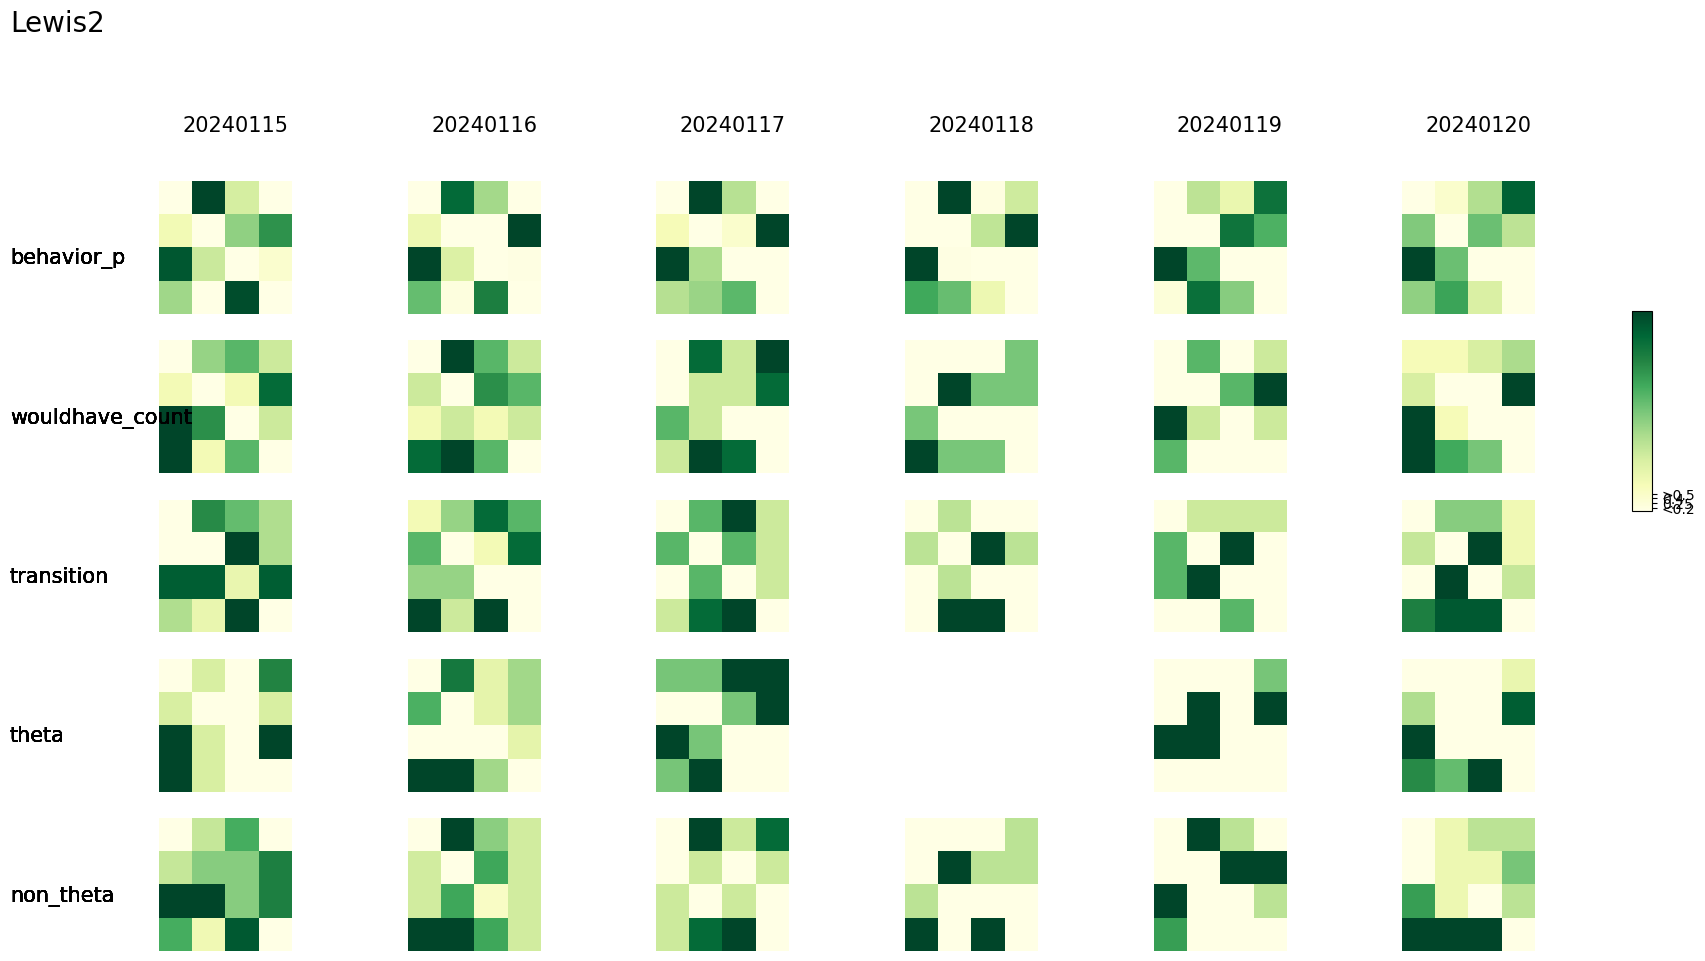

In [185]:
plot_matrix(animal, dates_to_plot, (P_behavior_all, transition_wouldhave[animal], transition[animal], theta_transitions,nontheta_transitions),
            ("behavior_p", "wouldhave_count","transition", "theta","non_theta"))

In [134]:
from spyglass.shijiegu.changeOfMind_triggered import correlate_transition_deltabehavior

(array([0.27272727, 0.45454545, 0.18181818, 0.09090909, 0.45454545,
        0.45454545, 0.61538462, 0.15384615, 0.23076923, 0.9       ,
        0.1       , 0.        ]),
 array([0.36363636, 0.18181818, 0.36363636, 0.72727273, 0.18181818,
        0.09090909, 0.30769231, 0.46153846, 0.23076923, 0.2       ,
        0.5       , 0.3       ]),
 array([0.28813559, 0.44067797, 0.26271186, 0.34736842, 0.17894737,
        0.47368421, 0.41176471, 0.4       , 0.18823529, 0.54347826,
        0.29347826, 0.16304348]))

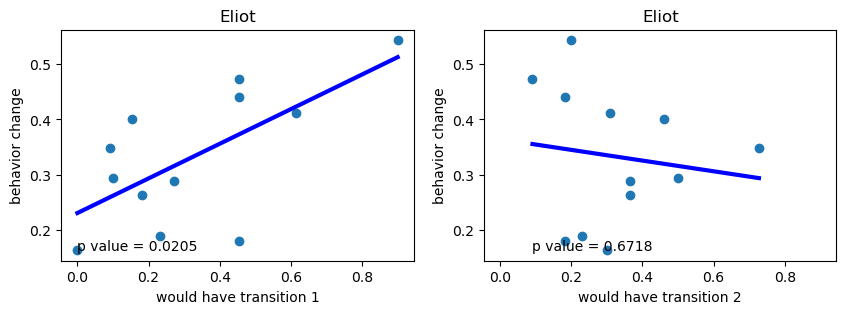

In [18]:
date = "20221019"

correlate_transition_deltabehavior(animal,
                                   transition_wouldhave[animal][date], transition[animal][date], P_behavior_all[date])

#### b. linear over time

In [124]:
#C_behavior

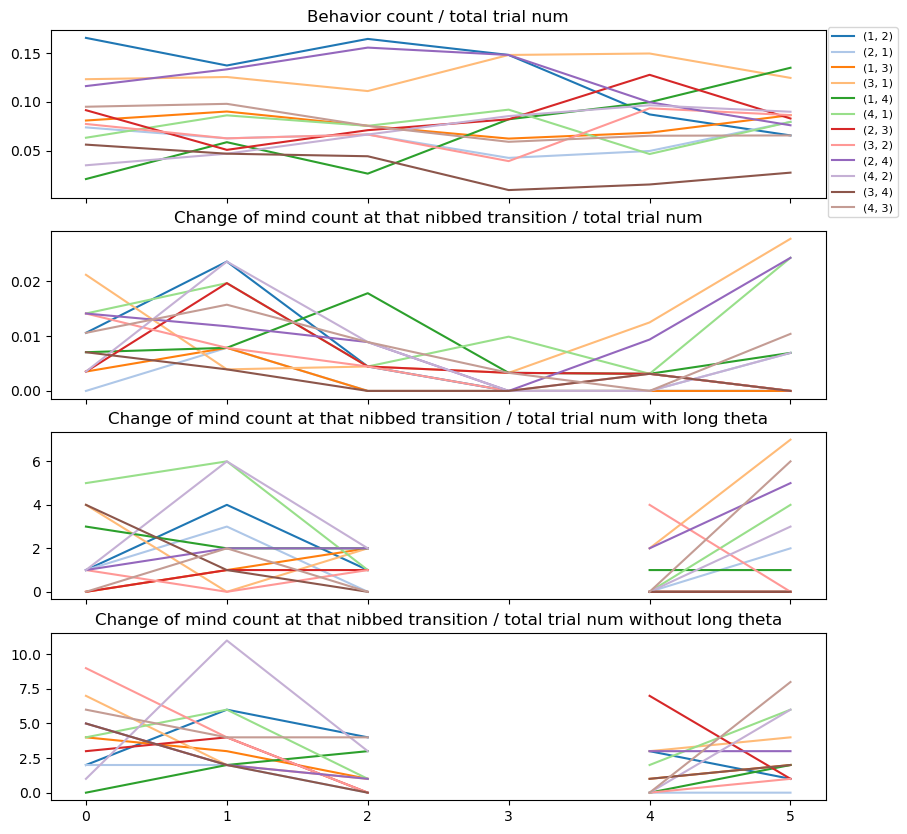

In [135]:
num_of_trials = np.nansum(C_behavior,axis = 1).reshape((-1,1))
C_behavior = C_behavior/num_of_trials
C_COM_rate = C_COM/num_of_trials

fig,axes = plt.subplots(4,1,figsize = (10,10),sharex = True)
for t_i in range(len(all_transitions)):
    axes[0].plot(C_behavior[:,t_i], label = all_transitions_legend[t_i], c=cmap(t_i))
    
    axes[1].plot(C_COM_rate[:,t_i],c=cmap(t_i))

    axes[2].plot(C_COM_theta[:,t_i],c=cmap(t_i))
    
    axes[3].plot(C_COM_nontheta[:,t_i],c=cmap(t_i))
    
    #axes[2].plot(C_COM_theta[:,t_i]/(C_COM_theta[:,t_i] + C_COM_nontheta[:,t_i]),c=cmap(t_i))
    
    #axes[3].plot(C_COM_nontheta[:,t_i]/(C_COM_theta[:,t_i] + C_COM_nontheta[:,t_i]),c=cmap(t_i))
    
axes[0].set_title("Behavior count / total trial num")
axes[1].set_title("Change of mind count at that nibbed transition / total trial num")
axes[2].set_title("Change of mind count at that nibbed transition / total trial num with long theta")
axes[3].set_title("Change of mind count at that nibbed transition / total trial num without long theta")
axes[0].legend(fontsize = 8,bbox_to_anchor=(1.1, 1.05))

#### c. Find transitions in which large distance between mental and physical distance occur.

First, get more triggered data from more days.

In [20]:
import statsmodels.api as sm
from spyglass.shijiegu.changeOfMind_triggered import (find_triggered_animal,
    plot_physical_vs_mental_position, parse_to_transitions, 
    find_large_position_minus_decode_trials, normalize_to_1, matrix_correlation,
    find_behavior_sum, find_transitions_sum, find_transitions, correlate_transition_deltabehavior,trials_date_session_to_dict
)
from spyglass.shijiegu.pairwiseDecode import behavior_transitions_count

In [21]:
def plot_matrix(animal, dates_to_plot, T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum):
    """plotting"""
    #dates_to_plot = np.unique([replay_tuple[0][5:13] for replay_tuple in replay_trials])
    
    fig,axes = plt.subplots(1,5,figsize = (12,8),sharex = True)
    axes[0].text(0,-3, animal+", data from:",fontsize = 12)
    axes[0].text(0,-2, dates_to_plot,fontsize = 12)
    axes[0].text(0,-1,'final transition',fontsize = 12)
    axes[1].text(-0.5,-1,'wouldhave transition1',fontsize = 12)
    axes[2].text(-0.5,-1,'wouldhave transition2',fontsize = 12)
    axes[3].text(0,-1,'transition 1 x 2',fontsize = 12)
    axes[4].text(0,-1,'delta behavior',fontsize = 12)
    
    data = normalize(T_sum)
    axes[0].imshow(data, vmin = np.nanquantile(data,0.1), vmax = np.nanquantile(data,0.9),
                   origin = 'upper',cmap = 'YlGn')
    axes[0].text(0.5,4.5,int(np.nansum(T_sum)))
    
    data = normalize(T_wouldhave_sum)
    axes[1].imshow(data, vmin = np.nanquantile(data,0.1), vmax = np.nanquantile(data,0.9),
                   origin = 'upper',cmap = 'YlGn')
    axes[1].text(0.5,4.5,int(np.nansum(T_wouldhave_sum)))
    
    data = normalize(T_wouldhave2_sum)
    axes[2].imshow(data, vmin = np.nanquantile(data,0.1), vmax = np.nanquantile(data,0.9),
                   origin = 'upper',cmap = 'YlGn')
    axes[2].text(0.5,4.5,int(np.nansum(T_wouldhave2_sum)))
    
    data = normalize(T_AB_sum)
    axes[3].imshow(data, vmin = np.nanquantile(data,0.1), vmax = np.nanquantile(data,0.9),
                   origin = 'upper',cmap = 'YlGn')
    
    
    data = delta_behavior
    im4 = axes[4].imshow(data, vmin = np.nanquantile(data,0.1), vmax = np.nanquantile(data,0.9),
                   origin = 'upper',cmap = 'jet')
    
    
    for i in range(5):
        axes[i].set_xticks(np.arange(4))
        axes[i].set_yticks(np.arange(4))
        axes[i].set_xticklabels(['1','2','3','4'])
        axes[i].set_yticklabels(['1','2','3','4'])
    
    # add space for colour bar
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.4, 0.01, 0.2])
    fig.colorbar(im4, cax=cbar_ax,ticks=[-0.02, 0, 0.05, 0.1])
    cbar_ax.set_yticklabels(['< -0.02', '0', '0.05', '>0.1'])  # vertically oriented colorbar

In [22]:
triggered_positions = {}
triggered_positions_abs = {}
triggered_decodes = {}
triggered_decodes_baseoff = {}
triggered_decodes_abs = {}
triggered_trial_info = {}

animal = 'Lewis'
dates_to_plot = ['20240102','20240103','20240104','20240105','20240106','20240107','20240108','20240109',
                 '20240110','20240113','20240114','20240115','20240116','20240117','20240118','20240119','20240120']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

animal = 'Eliot'
dates_to_plot = ['20221017','20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']

encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

animal = 'Haydn'
dates_to_plot = ['20230604','20230605','20230606','20230607','20230608']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

[13:49:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:49:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:49:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:49:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:49:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:49:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:49:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:49:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:49:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:49:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:49:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:49:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:49:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:49:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:49:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:49:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:49:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:49:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:49:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:49:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:49:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:49:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:49:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:49:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:49:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:49:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:49:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:49:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:50:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:50:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:50:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:50:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:50:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:50:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:50:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:50:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:50:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:50:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:50:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:50:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[13:50:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:50:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:50:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:50:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:50:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session2
pos 1 valid times


[13:50:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session3
pos 3 valid times


[13:50:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session4
pos 5 valid times


[13:50:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:50:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:50:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:50:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:50:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:50:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:50:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:50:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:50:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[13:50:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:50:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:50:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:50:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:50:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:50:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:50:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:50:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:50:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:50:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[13:50:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times
currently investigating:
05_Seq2Session3
pos 4 valid times


[13:50:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
07_Seq2Session4
pos 6 valid times


[13:50:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
09_Seq2Session5
pos 8 valid times


[13:50:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
11_Seq2Session6
pos 10 valid times


[13:50:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:50:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:50:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:50:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:50:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:50:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:50:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:50:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:50:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:50:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:50:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[13:50:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:50:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:50:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:50:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:50:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:50:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:50:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:51:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:51:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:51:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:51:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:51:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:51:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:51:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session2
pos 1 valid times


[13:51:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session3
pos 3 valid times


[13:51:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session4
pos 5 valid times


[13:51:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session5
pos 7 valid times


[13:51:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session6
pos 9 valid times


[13:51:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:51:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:51:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:51:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:51:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:51:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:51:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:51:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:51:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:51:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[13:51:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:51:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:51:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:51:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:51:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:51:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:51:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:51:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:51:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:51:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:51:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Rev3Session6
pos 11 valid times


[13:51:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:51:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:51:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:51:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:51:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:51:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:51:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:51:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:51:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:51:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
11_Rev3Session5
pos 10 valid times


[13:51:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:51:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:51:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:51:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:51:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


Second, apply cutoff and form transition matrices.

In [23]:
CUTOFF = 2

(all_x1, all_x2, all_y) =({}, {}, {})
replay_trials = {}
(retro_wouldhave_theta, transition_wouldhave_theta, transition_theta,
 correct_theta, correct_rand_theta, correct_wouldhave_theta,
 recent_theta, recent_wouldhave_theta) = ({}, {}, {}, {}, {}, {}, {}, {})

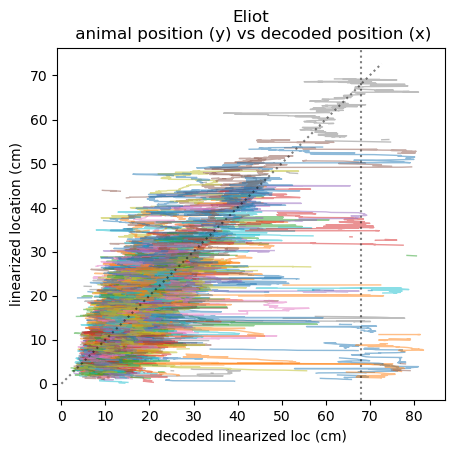

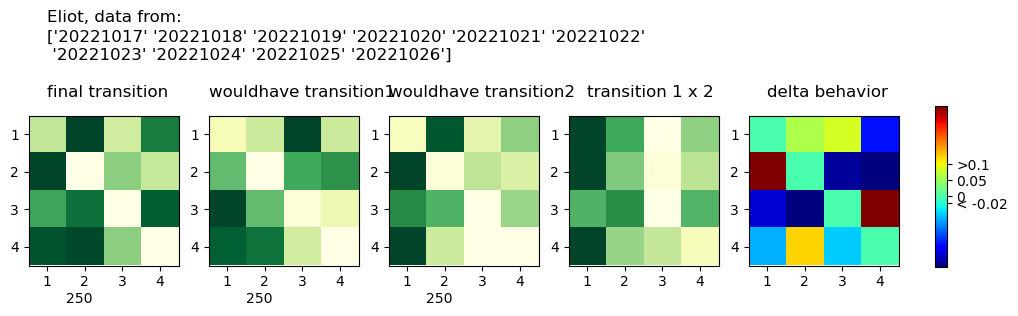

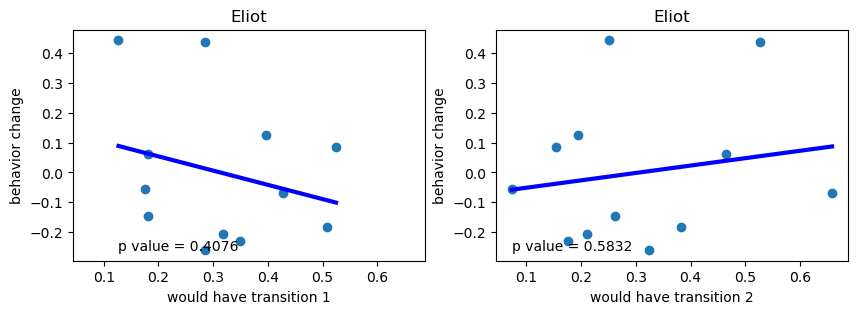

In [24]:
animal = "Eliot"
replay_trials[animal], inds = find_large_position_minus_decode_trials(animal, triggered_trial_info, 
                                            triggered_positions_abs, triggered_decodes_baseoff,cutoff = CUTOFF)
plot_physical_vs_mental_position(animal,
                                 [triggered_positions_abs[animal][xi] for xi in inds],
                                 [triggered_decodes_baseoff[animal][xi] for xi in inds])
T, T_wouldhave, T_wouldhave2 = find_transitions(replay_trials[animal])
dates_to_plot = np.unique([replay_tuple[0][5:13] for replay_tuple in replay_trials[animal]])

# the data for plotting:
T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum = find_transitions_sum(T, T_wouldhave, T_wouldhave2)
delta_behavior = find_behavior_sum(animal,replay_trials[animal])

plot_matrix(animal, dates_to_plot, T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum)

all_x1[animal], all_x2[animal], all_y[animal] = correlate_transition_deltabehavior(animal,
                                                                                   T_wouldhave_sum, T_wouldhave2_sum, delta_behavior)

In [25]:
trials_date_session_dict = trials_date_session_to_dict(replay_trials[animal])
    
print(animal)

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = seq2
    
(retro_wouldhave_theta[animal],transition_wouldhave_theta[animal], transition_theta[animal],
 correct_theta[animal], correct_rand_theta[animal], correct_wouldhave_theta[animal],
 recent_theta[animal], recent_wouldhave_theta[animal]) = find_triggered_transition_animal(animal, dates_to_plot, seq_maps, trialinfo = trials_date_session_dict)

[13:51:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


Eliot
currently investigating:
02_Seq2Session1
pos 1 valid times


[13:51:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:51:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:51:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:51:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:51:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[13:51:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times
currently investigating:
05_Seq2Session3
pos 4 valid times


[13:51:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
07_Seq2Session4
pos 6 valid times


[13:51:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
09_Seq2Session5
pos 8 valid times


[13:51:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
11_Seq2Session6
pos 10 valid times


[13:51:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:51:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:51:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:51:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:51:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:51:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:51:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:51:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:51:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:51:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:51:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[13:51:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:51:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:51:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:51:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:52:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:52:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:52:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:52:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:52:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:52:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:52:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:52:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:52:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:52:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session2
pos 1 valid times


[13:52:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session3
pos 3 valid times


[13:52:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session4
pos 5 valid times


[13:52:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session5
pos 7 valid times


[13:52:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session6
pos 9 valid times


[13:52:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:52:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:52:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:52:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:52:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:52:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:52:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:52:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:52:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:52:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


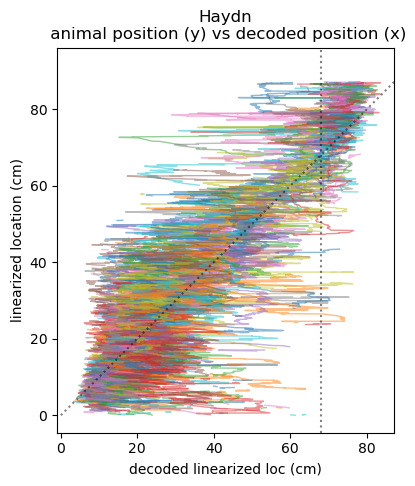

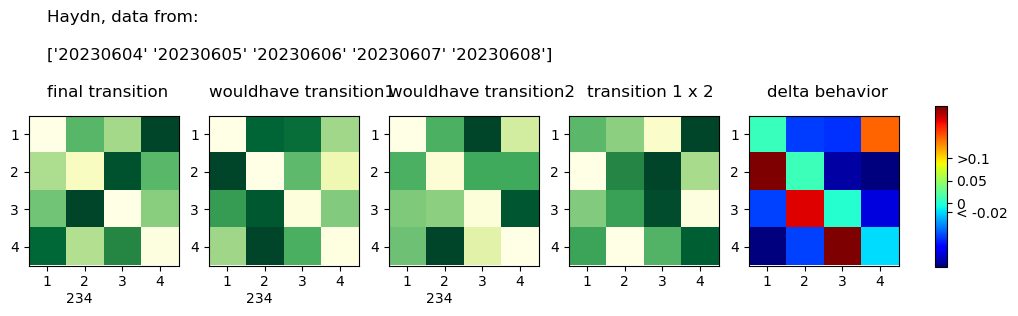

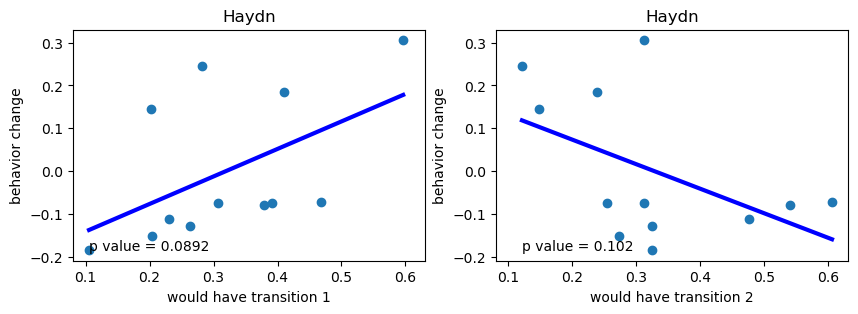

In [26]:
animal = "Haydn"
replay_trials[animal], inds = find_large_position_minus_decode_trials(animal, triggered_trial_info, 
                                            triggered_positions_abs, triggered_decodes_baseoff,cutoff = CUTOFF)
plot_physical_vs_mental_position(animal,
                                 [triggered_positions_abs[animal][xi] for xi in inds],
                                 [triggered_decodes_baseoff[animal][xi] for xi in inds])
T, T_wouldhave, T_wouldhave2 = find_transitions(replay_trials[animal])
dates_to_plot = np.unique([replay_tuple[0][5:13] for replay_tuple in replay_trials[animal]])

# the data for plotting:
T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum = find_transitions_sum(T, T_wouldhave, T_wouldhave2)
delta_behavior = find_behavior_sum(animal,replay_trials[animal])

plot_matrix(animal, dates_to_plot, T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum)

all_x1[animal], all_x2[animal], all_y[animal] = correlate_transition_deltabehavior(animal,
                                                                                   T_wouldhave_sum, T_wouldhave2_sum, delta_behavior)


In [27]:
trials_date_session_dict = trials_date_session_to_dict(replay_trials[animal])

dates_to_plot = np.unique([replay_tuple[0][5:13] for replay_tuple in replay_trials[animal]])
    
print(animal)

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = rev3
    
(retro_wouldhave_theta[animal],transition_wouldhave_theta[animal], transition_theta[animal],
 correct_theta[animal], correct_rand_theta[animal], correct_wouldhave_theta[animal],
 recent_theta[animal], recent_wouldhave_theta[animal]) = find_triggered_transition_animal(animal, dates_to_plot, seq_maps, trialinfo = trials_date_session_dict)

[13:52:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


Haydn
currently investigating:
02_Rev3Session1
pos 1 valid times


[13:52:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:52:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:52:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:52:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:52:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:52:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:52:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:52:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:52:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:52:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Rev3Session6
pos 11 valid times


[13:52:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:52:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:52:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:52:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:52:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:52:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:52:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:52:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:52:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:52:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
11_Rev3Session5
pos 10 valid times


[13:52:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:52:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:52:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:52:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:52:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


In [28]:
animal = 'Lewis'
animal_save_name = 'Lewis1'

dates_to_plot = ['20240102','20240103','20240104','20240105','20240106','20240107','20240108','20240109',
                 '20240110','20240113','20240114']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'

(triggered_positions[animal_save_name], triggered_positions_abs[animal_save_name],
 triggered_decodes[animal_save_name], triggered_decodes_baseoff[animal_save_name], triggered_decodes_abs[animal_save_name],
 triggered_trial_info[animal_save_name]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

[13:52:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:52:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:52:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:52:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:52:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:52:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:52:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:52:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:52:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:52:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:52:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:52:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:52:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:52:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:52:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:52:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:52:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:52:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:52:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:52:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:52:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:52:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:52:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:52:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:53:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


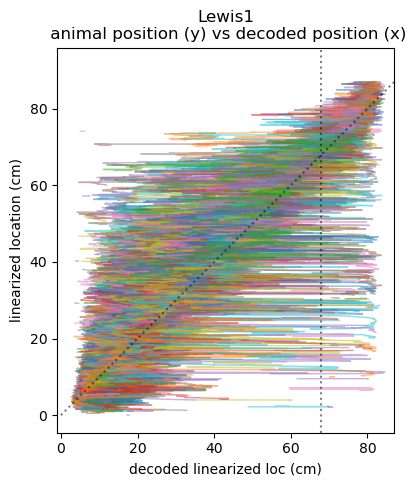

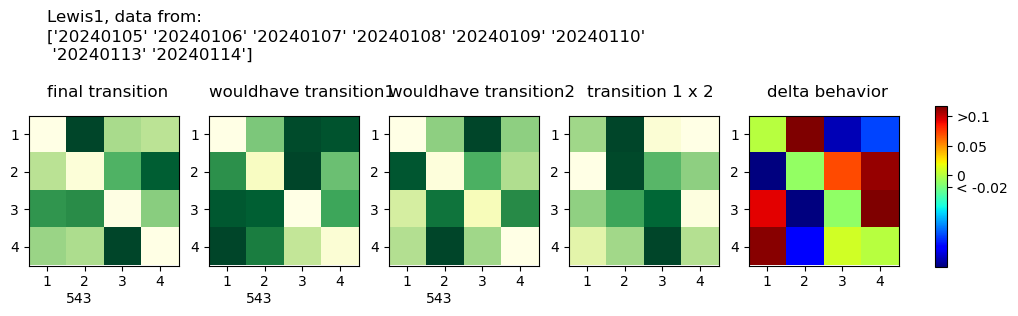

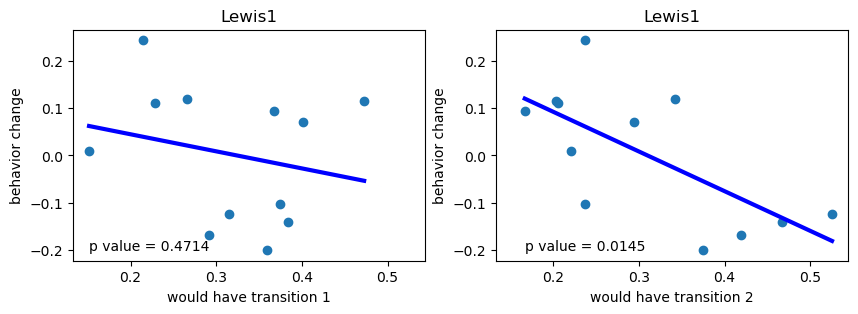

In [29]:
animal = "Lewis"
animal_save_name = 'Lewis1'

replay_trials[animal_save_name], inds = find_large_position_minus_decode_trials(animal_save_name, triggered_trial_info, 
                                            triggered_positions_abs, triggered_decodes_baseoff,cutoff = CUTOFF)
plot_physical_vs_mental_position(animal_save_name,
                                 [triggered_positions_abs[animal_save_name][xi] for xi in inds],
                                 [triggered_decodes_baseoff[animal_save_name][xi] for xi in inds])
T, T_wouldhave, T_wouldhave2 = find_transitions(replay_trials[animal_save_name])
dates_to_plot = np.unique([replay_tuple[0][5:13] for replay_tuple in replay_trials[animal_save_name]])

# the data for plotting:
T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum = find_transitions_sum(T, T_wouldhave, T_wouldhave2)
delta_behavior = find_behavior_sum(animal,replay_trials[animal_save_name])

plot_matrix(animal_save_name, dates_to_plot, T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum)

all_x1[animal_save_name], all_x2[animal_save_name], all_y[animal_save_name] = correlate_transition_deltabehavior(animal_save_name,
                                                                                   T_wouldhave_sum, T_wouldhave2_sum, delta_behavior)


In [30]:
trials_date_session_dict = trials_date_session_to_dict(replay_trials[animal_save_name])

dates_to_plot = np.unique([replay_tuple[0][5:13] for replay_tuple in replay_trials[animal_save_name]])
    
print(animal_save_name)

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = rev2
    
(retro_wouldhave_theta[animal_save_name],transition_wouldhave_theta[animal_save_name], transition_theta[animal_save_name],
 correct_theta[animal_save_name], correct_rand_theta[animal_save_name], correct_wouldhave_theta[animal_save_name],
 recent_theta[animal_save_name], recent_wouldhave_theta[animal_save_name]) = find_triggered_transition_animal(animal,
                                                                                                              dates_to_plot, seq_maps, trialinfo = trials_date_session_dict)

[13:53:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


Lewis1
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[13:53:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:53:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:53:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:53:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:53:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


In [31]:
animal = 'Lewis'
animal_save_name = 'Lewis2'
dates_to_plot = ['20240115','20240116','20240117','20240118','20240119','20240120']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'

(triggered_positions[animal_save_name], triggered_positions_abs[animal_save_name],
 triggered_decodes[animal_save_name], triggered_decodes_baseoff[animal_save_name], triggered_decodes_abs[animal_save_name],
 triggered_trial_info[animal_save_name]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

[13:53:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:53:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:53:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:53:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:53:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[13:53:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:53:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:53:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:53:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:53:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session2
pos 1 valid times


[13:53:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session3
pos 3 valid times


[13:53:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session4
pos 5 valid times


[13:53:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:53:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:54:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:54:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:54:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:54:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:54:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:54:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:54:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[13:54:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:54:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:54:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:54:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


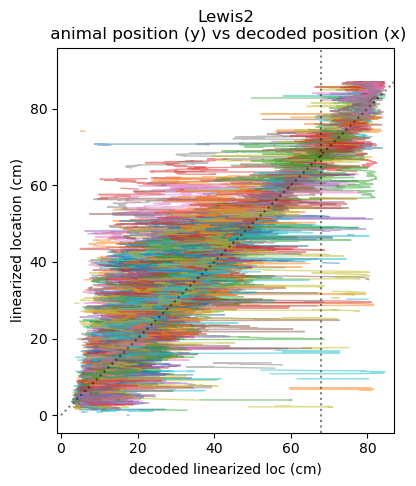

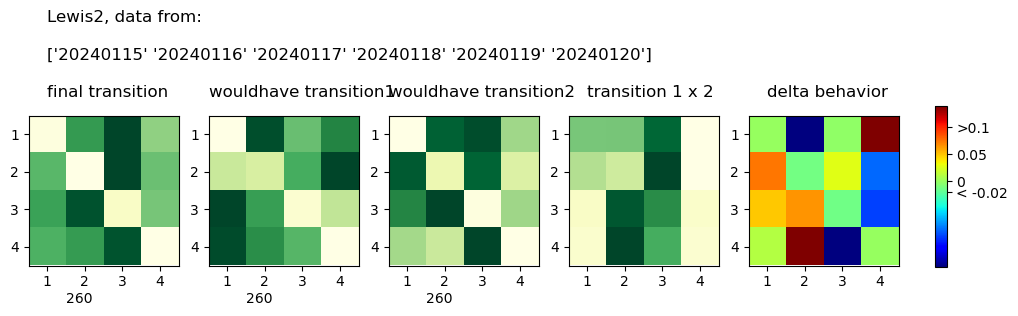

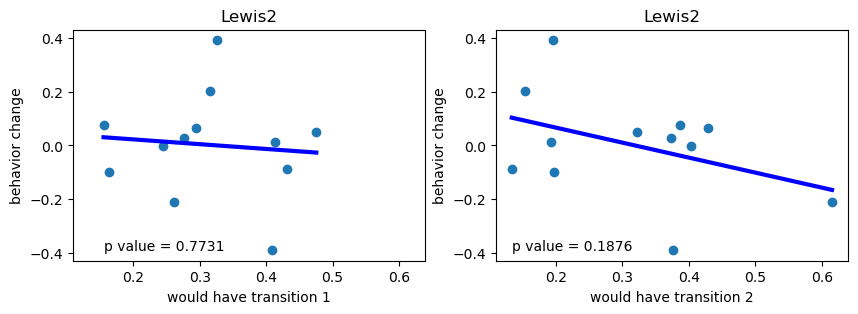

In [32]:
animal = "Lewis"
animal_save_name = 'Lewis2'

replay_trials[animal_save_name], inds = find_large_position_minus_decode_trials(animal_save_name, triggered_trial_info, 
                                            triggered_positions_abs, triggered_decodes_baseoff,cutoff = CUTOFF)
plot_physical_vs_mental_position(animal_save_name,
                                 [triggered_positions_abs[animal][xi] for xi in inds],
                                 [triggered_decodes_baseoff[animal][xi] for xi in inds])
T, T_wouldhave, T_wouldhave2 = find_transitions(replay_trials[animal_save_name])
dates_to_plot = np.unique([replay_tuple[0][5:13] for replay_tuple in replay_trials[animal_save_name]])

# the data for plotting:
T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum = find_transitions_sum(T, T_wouldhave, T_wouldhave2)
delta_behavior = find_behavior_sum(animal,replay_trials[animal_save_name])

plot_matrix(animal_save_name, dates_to_plot, T_sum, T_wouldhave_sum, T_wouldhave2_sum, T_AB_sum)

all_x1[animal_save_name], all_x2[animal_save_name], all_y[animal_save_name] = correlate_transition_deltabehavior(animal_save_name,
                                                                                   T_wouldhave_sum, T_wouldhave2_sum, delta_behavior)


In [33]:
trials_date_session_dict = trials_date_session_to_dict(replay_trials[animal_save_name])

dates_to_plot = np.unique([replay_tuple[0][5:13] for replay_tuple in replay_trials[animal_save_name]])
    
print(animal_save_name)

seq_maps = {}
for d in dates_to_plot:
    seq_maps[d] = rev1
    
(retro_wouldhave_theta[animal_save_name],transition_wouldhave_theta[animal_save_name], transition_theta[animal_save_name],
 correct_theta[animal_save_name], correct_rand_theta[animal_save_name], correct_wouldhave_theta[animal_save_name],
 recent_theta[animal_save_name], recent_wouldhave_theta[animal_save_name]) = find_triggered_transition_animal(animal,
                                                                                                              dates_to_plot, seq_maps, trialinfo = trials_date_session_dict)

[13:54:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


Lewis2
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:54:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:54:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:54:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:54:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[13:54:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:54:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:54:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:54:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:54:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session2
pos 1 valid times


[13:54:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session3
pos 3 valid times


[13:54:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session4
pos 5 valid times


[13:54:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:54:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:54:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:54:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:54:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:54:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:54:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:54:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[13:54:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev1Session5
pos 9 valid times


[13:54:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[13:54:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[13:54:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[13:54:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


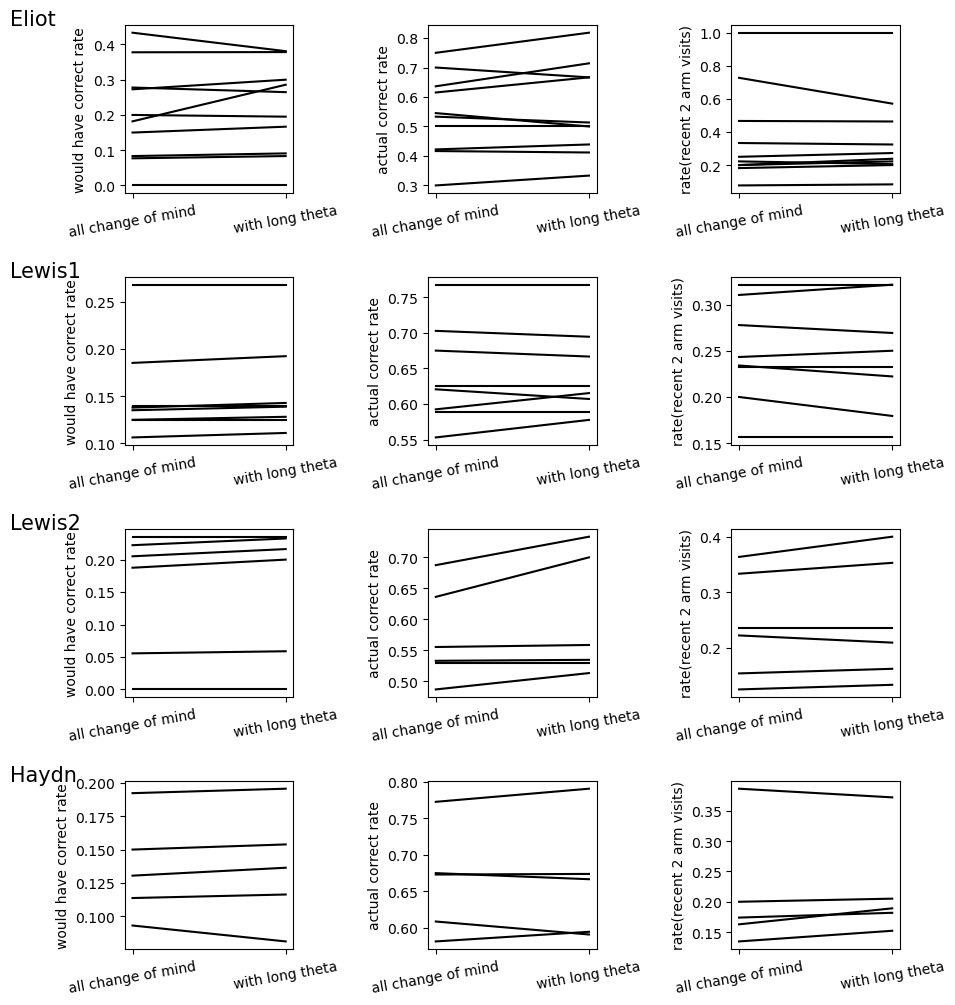

In [34]:
animals = ["Eliot","Lewis1","Lewis2","Haydn"]
fig,axes = plt.subplots(len(animals),3,figsize = (10,3*len(animals)))
plt.subplots_adjust(wspace=0.8, hspace=0.5)

row_ind = 0
for animal in animals:
    
    dates_to_plot = list(correct_wouldhave[animal].keys())
    for d_ind in range(len(dates_to_plot)):
        d = dates_to_plot[d_ind]
        if d not in correct[animal] or d not in correct_theta[animal]:
            continue
            
  
        correct_wouldhave_day = correct_wouldhave[animal][d]
        correct_wouldhave_theta_day = correct_wouldhave_theta[animal][d]

        correct_day = correct[animal][d]
        correct_theta_day = correct_theta[animal][d]

        recent_wouldhave_day = recent_wouldhave[animal][d]
        recent_wouldhave_theta_day = recent_wouldhave_theta[animal][d]
    
        # rate
        rate_wouldhave = np.sum(correct_wouldhave_day)/len(correct_wouldhave_day)
        rate_wouldhave_theta = np.sum(correct_wouldhave_theta_day)/len(correct_wouldhave_theta_day)
        
        recent_rate_wouldhave = np.sum(recent_wouldhave_day)/len(recent_wouldhave_day)
        recent_rate_wouldhave_theta = np.sum(recent_wouldhave_theta_day)/len(recent_wouldhave_theta_day)

        correct_rate = np.sum(correct_day)/len(correct_day)
        correct_theta_rate = np.sum(correct_theta_day)/len(correct_theta_day)

        
        #if len(correct_wouldhave_day) <= 5:
        #    continue
        
        axes[row_ind,0].plot([1,2],[rate_wouldhave,rate_wouldhave_theta],color = 'k')
        axes[row_ind,1].plot([1,2],[correct_rate,correct_theta_rate],color = 'k')
        axes[row_ind,2].plot([1,2],[recent_rate_wouldhave,recent_rate_wouldhave_theta],color = 'k')

    axes[row_ind,0].set_xticks([1,2])
    axes[row_ind,0].set_xticklabels(['all change of mind','with long theta'],rotation = 10)
    axes[row_ind,0].set_ylabel('would have correct rate')
        
    axes[row_ind,1].set_xticks([1,2])
    axes[row_ind,1].set_xticklabels(['all change of mind','with long theta'],rotation = 10)
    axes[row_ind,1].set_ylabel('actual correct rate')

    axes[row_ind,2].set_xticks([1,2])
    axes[row_ind,2].set_xticklabels(['all change of mind','with long theta'],rotation = 10)
    axes[row_ind,2].set_ylabel('rate(recent 2 arm visits)')

    axes[row_ind,0].text(0.2,axes[row_ind,0].get_ylim()[1],animal,fontsize = 15)
    row_ind += 1

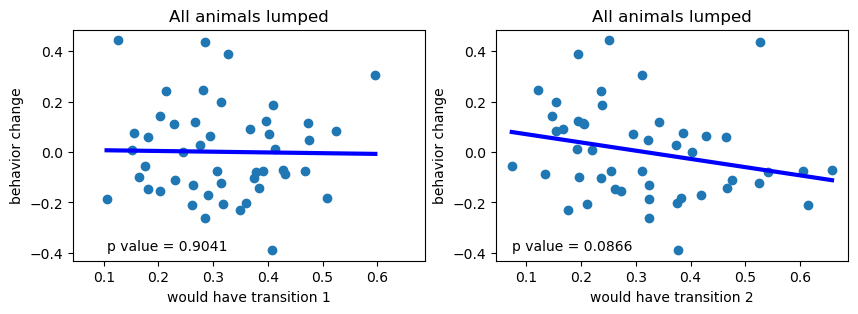

In [35]:
(all_x1_array, all_x2_array, all_y_array) = ([], [], [])
for animal in ["Eliot","Lewis1","Lewis2","Haydn"]:
    all_x1_array.append(all_x1[animal])
    all_x2_array.append(all_x2[animal])
    all_y_array.append(all_y[animal])
    
correlate_transition_deltabehavior("All animals lumped",None, None, None,
                                   x1 = np.concatenate(all_x1_array),
                                   x2 = np.concatenate(all_x2_array),
                                   y = np.concatenate(all_y_array));

### C. Trial Speed (Time for Trial Completion)

In [166]:
from spyglass.shijiegu.changeOfMind_triggered import find_triggered_trial_completion_animal

In [143]:
CUTOFF1 = 25
replay_trials1 = {}
(time1,time2,num1,num2) = ({},{},{},{})

[10:01:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[10:01:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [144]:
animals = ["Eliot","Haydn","Lewis1","Lewis2"]

In [176]:
for animal_save_name in animals:

    replay_trials1[animal_save_name], inds = find_large_position_minus_decode_trials(animal_save_name, triggered_trial_info, 
                                                triggered_positions_abs, triggered_decodes_baseoff,cutoff = CUTOFF1)
    
    trials_date_session_dict1 = trials_date_session_to_dict(replay_trials1[animal_save_name])
    
    time1[animal_save_name],num1[animal_save_name] = find_triggered_trial_completion_animal(trials_date_session_dict1,long_theta_flag = True)
    time2[animal_save_name],num2[animal_save_name] = find_triggered_trial_completion_animal(trials_date_session_dict1,long_theta_flag = False)
        

[15:44:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[15:44:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[15:44:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[15:44:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[15:44:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearizatio

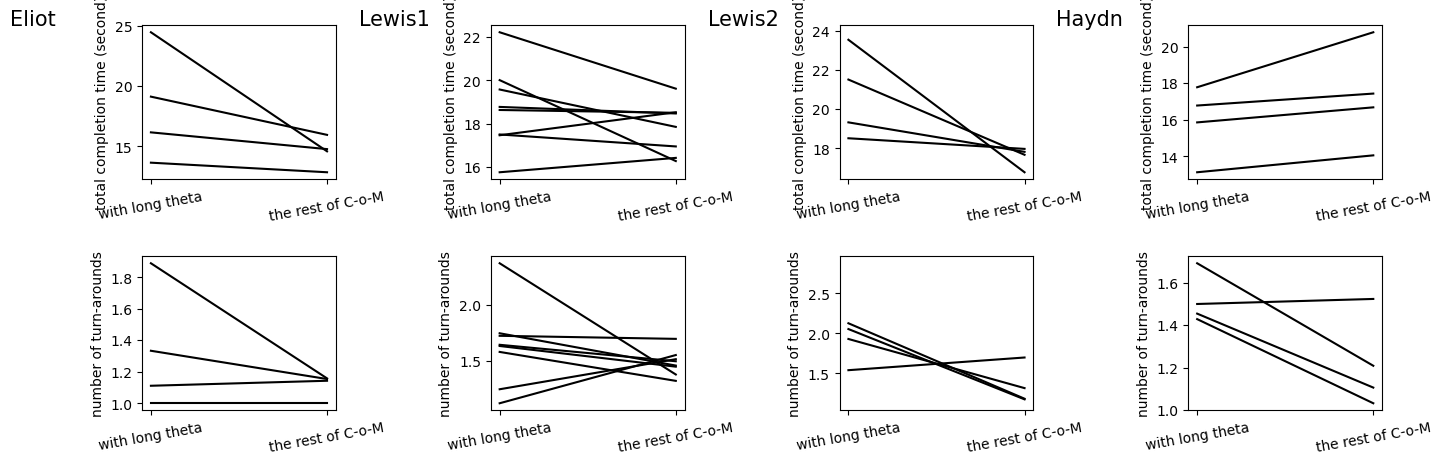

In [177]:
animals = ["Eliot","Lewis1","Lewis2","Haydn"]
fig,axes = plt.subplots(2,len(animals),figsize = (4*len(animals),5))
plt.subplots_adjust(wspace=0.8, hspace=0.5)

row_ind = 0
for animal in animals:
    
    dates_to_plot = list(time1[animal].keys())
    for d_ind in range(len(dates_to_plot)):
        d = dates_to_plot[d_ind]
        if d not in time1[animal] or d not in time2[animal]:
            continue
  
        time_theta = time1[animal][d]
        time_nontheta = time2[animal][d]
        
        axes[0,row_ind].plot([1,2],[time_theta,time_nontheta],color = 'k')

        axes[1,row_ind].plot([1,2],[num1[animal][d],num2[animal][d]],color = 'k')
        

    axes[0,row_ind].set_xticks([1,2])
    axes[0,row_ind].set_xticklabels(['with long theta','the rest of C-o-M'],rotation = 10)
    axes[0,row_ind].set_ylabel('total completion time (second)')
    
    axes[1,row_ind].set_xticks([1,2])
    axes[1,row_ind].set_xticklabels(['with long theta','the rest of C-o-M'],rotation = 10)
    axes[1,row_ind].set_ylabel('number of turn-arounds')

    axes[0,row_ind].text(0.2,axes[0,row_ind].get_ylim()[1],animal,fontsize = 15)
    row_ind += 1

### End here

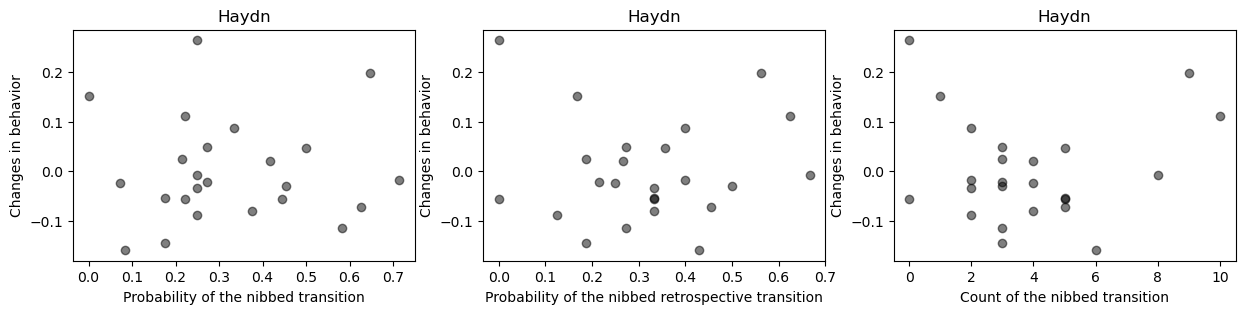

In [981]:
fig,axes = plt.subplots(1,3,figsize = (15,3))

for ind in range(3):
    if ind == 0:
        x, y = return_xy(dates_to_plot,P_behavior,P_COM,diff_y = True)
        axes[ind].set_xlabel("Probability of the nibbed transition")
    elif ind == 1:
        x, y = return_xy(dates_to_plot,P_behavior,P_COM_retro,diff_y = True)
        axes[ind].set_xlabel("Probability of the nibbed retrospective transition")
    elif ind == 2:
        x, y = return_xy(dates_to_plot,P_behavior,C_COM_retro,diff_y = True)
        axes[ind].set_xlabel("Count of the nibbed transition")
    results, pvalue = fitLM(x,y)
    
    axes[ind].scatter(x,y, c = 'k',alpha = 0.5)
    x_plot=np.linspace(np.min(x),np.max(x),10).reshape(-1,1)
    y_plot=results.predict(sm.add_constant(x_plot))
    pvalue_beta = results.pvalues[1]
    if pvalue_beta <= 0.1:
        axes[ind].plot(x_plot,y_plot,color='blue',linewidth=3,label = str(pvalue))
        axes[ind].text(np.min(x),np.min(y),f'p value = {np.round(pvalue_beta,4)}')
        
    axes[ind].set_ylabel("Changes in behavior")
    axes[ind].set_title(animal)


In [946]:
pvalue_beta

4.9417323305102286e-05

In [838]:
cmap = plt.get_cmap('tab20')

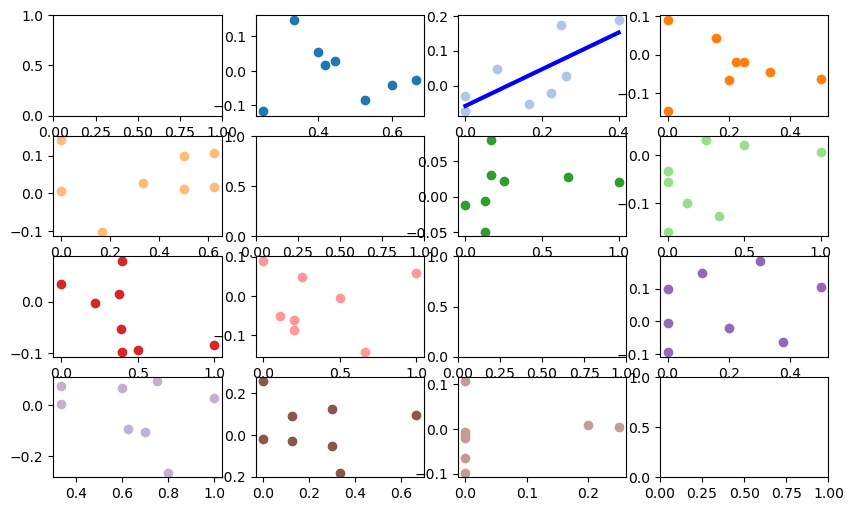

In [850]:
fig,axes = plt.subplots(4,4,figsize = (10,6))
for t_i in range(len(all_transitions)):
    (i,j) = all_transitions[t_i]
    x_ij = []
    y_ij = []
    for d_ind in range(len(dates_to_plot)-1):
        x = P_COM_retro[d_ind,t_i] #P_COM[d_ind,t_i]
        y = P_behavior[d_ind+1,t_i] - P_behavior[d_ind,t_i]
        if np.isnan(x) or np.isnan(y):
            continue
        x_ij.append(x)
        y_ij.append(y)

    axes[i,j].scatter(x_ij,y_ij, color = cmap(t_i))
    
    x_ij_ = sm.add_constant(x_ij)
    results = sm.OLS(y_ij, x_ij_).fit()

    
    x_plot=np.linspace(np.min(x_ij),np.max(x_ij),10).reshape(-1,1)
    y_plot=results.predict(sm.add_constant(x_plot))
    pvalue = results.f_pvalue
    if pvalue <= 0.05:
        axes[i,j].plot(x_plot,y_plot,color='blue',linewidth=3,label = str(pvalue)) #label=f'y={round(b0[0],1)}+{round(b[0][0],2)}x,{pvalue}')
        